In [128]:
%matplotlib inline

In [12]:
import pandas as pd
import numpy as np

import pytz
from datetime import datetime

import json
import urllib



In [56]:
url = "http://www.gw2spidy.com/chart/19721"
response = urllib.request.urlopen(url)

In [57]:
str_response = response.readall().decode('ascii')


In [63]:
str_response[0]

'['

In [64]:
obj = json.loads(str_response)

In [71]:
obj[0].keys()

dict_keys(['data', 'yAxis', 'visible', 'type', 'name'])

In [106]:
unix_time = np.array([x[0] // 1000 for x in obj[0]["data"]]).astype('datetime64[s]')
datetime = pd.DatetimeIndex(unix_time)

1657

In [109]:
datetime

DatetimeIndex(['2012-08-31 00:00:00', '2012-09-01 00:00:00',
               '2012-09-02 00:00:00', '2012-09-03 00:00:00',
               '2012-09-04 00:00:00', '2012-09-05 00:00:00',
               '2012-09-06 00:00:00', '2012-09-07 00:00:00',
               '2012-09-08 00:00:00', '2012-09-09 00:00:00',
               ...
               '2016-05-28 14:45:52', '2016-05-28 16:50:10',
               '2016-05-28 20:20:29', '2016-05-28 22:06:56',
               '2016-05-29 00:51:36', '2016-05-29 03:45:47',
               '2016-05-29 06:09:15', '2016-05-29 08:12:21',
               '2016-05-29 11:41:45', '2016-05-29 13:29:18'],
              dtype='datetime64[ns]', length=1657, freq=None)

In [124]:
df = pd.DataFrame()
for it in obj:
    prices = [x[1] for x in it["data"]]
    df[it["name"]] = pd.Series(prices)

df.index = datetime

In [131]:
df

,Sell Listings Volume 1 Day Mv Avg,Buy Listings Volume 1 Day Mv Avg,Sell Listings Raw Data,Sell Listings 1 Day Mv Avg,Sell Listings Volume,Buy Listings Raw Data,Buy Listings 1 Day Mv Avg,Buy Listings Volume
2012-08-31 00:00:00,30.000000,27.000000,5000,5000.000000,30,1346,1346.000000,27
2012-09-01 00:00:00,111.000000,92.500000,2750,3875.000000,192,1767,1556.500000,158
2012-09-02 00:00:00,187.000000,244.000000,1809,2279.500000,182,1646,1706.500000,330
2012-09-03 00:00:00,224.000000,536.500000,3075,2442.000000,266,2182,1914.000000,743
2012-09-04 00:00:00,549.500000,987.000000,2357,2716.000000,833,2063,2122.500000,1231
2012-09-05 00:00:00,956.500000,1489.000000,2115,2236.000000,1080,1947,2005.000000,1747
2012-09-06 00:00:00,1283.000000,2011.500000,1991,2053.000000,1486,1846,1896.500000,2276
2012-09-07 00:00:00,1778.500000,2292.500000,1923,1957.000000,2071,1763,1804.500000,2309
2012-09-08 00:00:00,2033.500000,2770.000000,1872,1897.500000,1996,1804,1783.500000,3231
2012-09-09 00:00:00,2180.500000,3546.500000,1894,1883.000000,2365,1835,1819.500000,3862


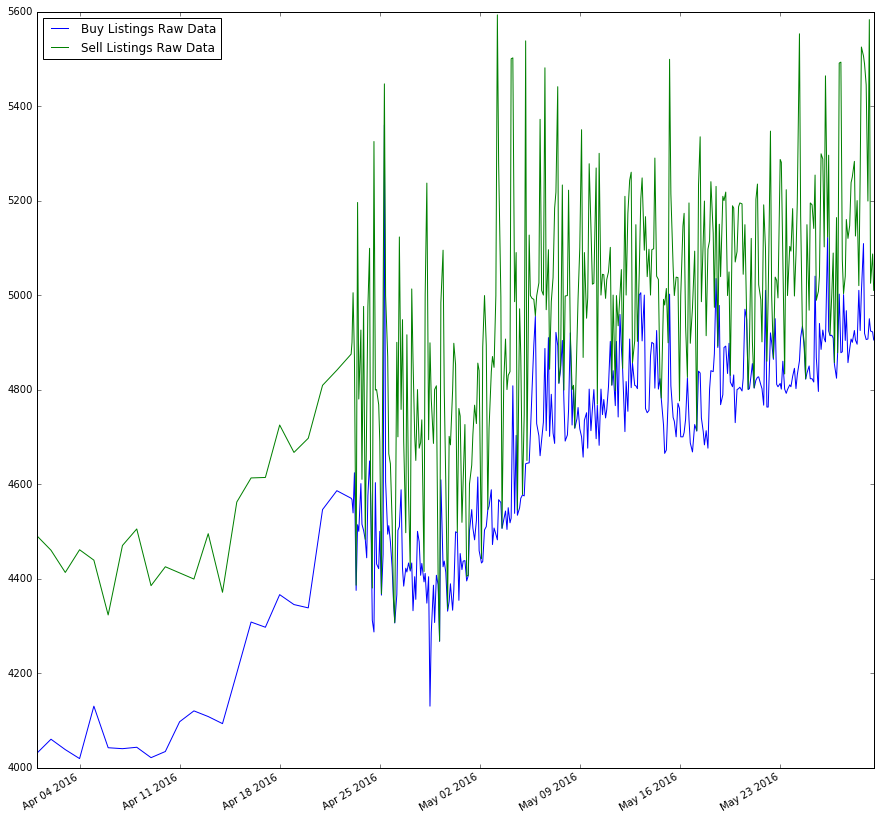

In [138]:
df['2016-04':'2016-05'][["Buy Listings Raw Data", "Sell Listings Raw Data"]].plot(figsize=(15,15))

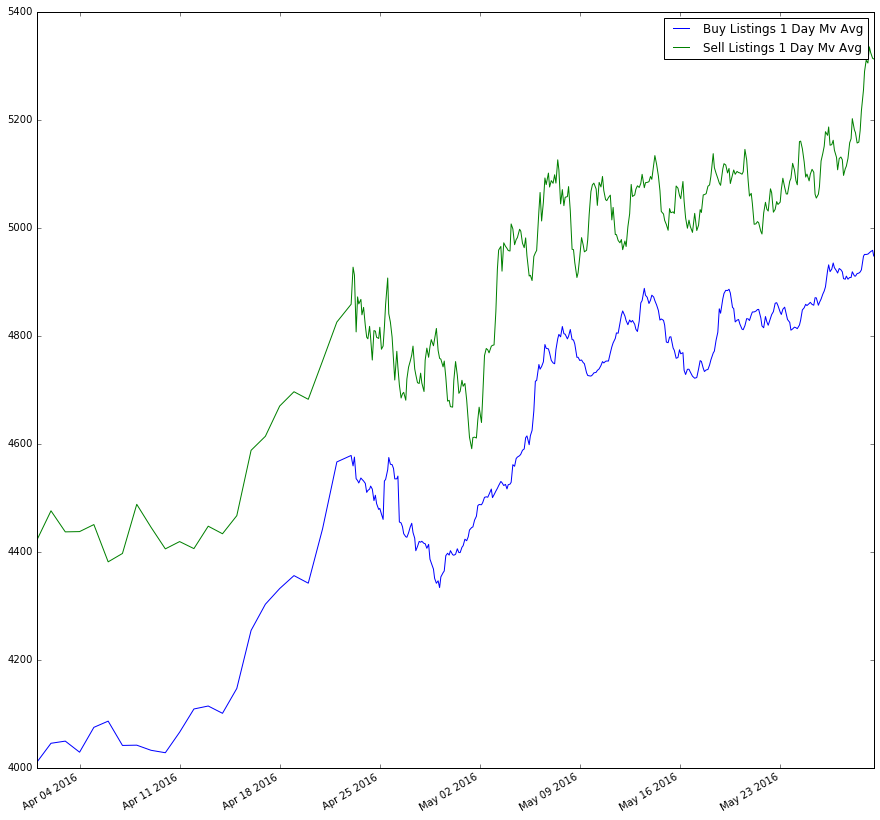

In [139]:
df['2016-04':'2016-05'][["Buy Listings 1 Day Mv Avg", "Sell Listings 1 Day Mv Avg"]].plot(figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D4B0828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000119DCF98>]], dtype=object)

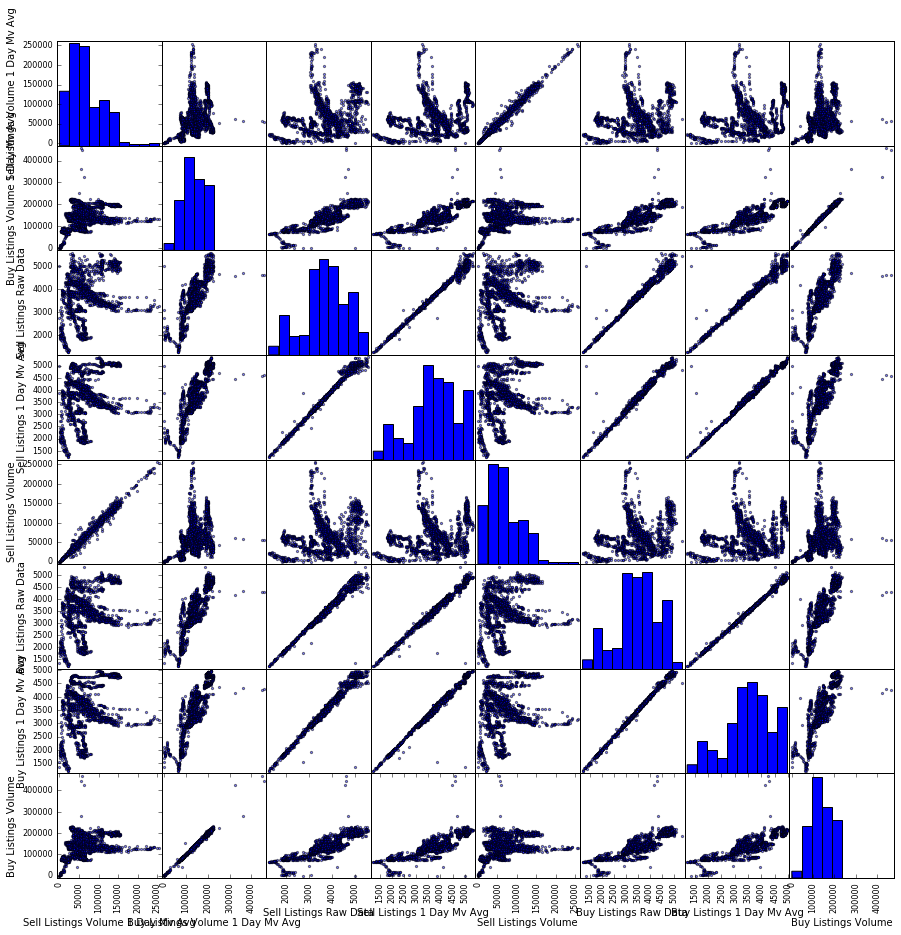

In [141]:
pd.scatter_matrix(df, diagonal="hist", figsize=(15,15))